# Decision Trees

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
iris = load_iris()

plt.rcParams["figure.figsize"] = (8, 5)

In [137]:
iris = load_iris()
X, y = iris.data[:,2:], iris.target
max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

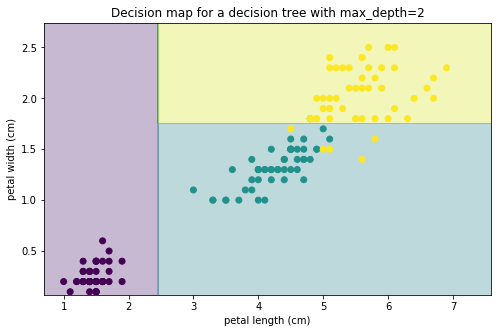

In [143]:
x1min, x2min = X.min(axis=0) * 0.7
x1max, x2max = X.max(axis=0) * 1.1

x1map, x2map = np.mgrid[x1min:x1max:0.01, x2min:x2max:0.01]
xpred = np.c_[x1map.reshape(-1,1), x2map.reshape(-1,1)]
ypred = tree_clf.predict(xpred).reshape(x1map.shape)
plt.contourf(x1map, x2map, ypred, alpha=0.3)
plt.scatter(*X.T, c=y)
plt.title(f"Decision map for a decision tree with max_depth={max_depth}")
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3]);

In [139]:
# Probability of a classification is the "impurity" when classifying
tree_clf.predict_proba([[5, 1.5]]), tree_clf.predict_proba([[5, 1]])

(array([[0.        , 0.90740741, 0.09259259]]),
 array([[0.        , 0.90740741, 0.09259259]]))

In [140]:
export_graphviz(
    tree_clf,
    out_file="./images/iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [141]:
%%bash
dot -Tpng "./images/iris_tree.dot" -o "./images/iris_tree.png"

<img style="center" src="./images/iris_tree.png">

In [142]:
g1 = 1 - ((0 / 54) ** 2 + (49 / 54) ** 2 + (5 / 54) ** 2)
print(f"Gini score for bottom left leaf: {g1:0.5f}")

Gini score for bottom left leaf: 0.16804
